In [24]:
using Downloads
using CSV
using MLJ
using DataFrames
using GLM
using Random
using ROCCurves
using FreqTables
using StatsPlots

In [25]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"
Downloads.download(url, "australian.csv")

"australian.csv"

In [26]:

dataset = CSV.read("australian.csv", DataFrame, delim=' ';
                header = append!([string("V", i) for i in 0:13], ["class"]))

Row,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,class
,Int64,Float64,Float64,Int64,Int64,Int64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
2,0,22.67,7.0,2,8,4,0.165,0,0,0,0,2,160,1,0
3,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0
4,0,21.67,11.5,1,5,3,0.0,1,1,11,1,2,0,1,1
5,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1
6,0,15.83,0.585,2,8,8,1.5,1,1,2,0,2,100,1,1
7,1,17.42,6.5,2,3,4,0.125,0,0,0,0,2,60,101,0
8,0,58.67,4.46,2,11,8,3.04,1,1,6,0,2,43,561,1
9,1,27.83,1.0,1,2,8,3.0,0,0,0,0,2,176,538,0


In [27]:

dataset.V3 = ifelse.(dataset.V3 .== 1, 0, 1)
dataset.V11 = ifelse.(dataset.V11 .== 1, 0, 1)
dataset.V13 = log.(dataset.V13) 
dataset
     

Row,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,class
,Int64,Float64,Float64,Int64,Int64,Int64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Int64
1,1,22.08,11.46,1,4,4,1.585,0,0,0,1,1,100,7.10085,0
2,0,22.67,7.0,1,8,4,0.165,0,0,0,0,1,160,0.0,0
3,0,29.58,1.75,0,4,4,1.25,0,0,0,1,1,280,0.0,0
4,0,21.67,11.5,0,5,3,0.0,1,1,11,1,1,0,0.0,1
5,1,20.17,8.17,1,6,4,1.96,1,1,14,0,1,60,5.0689,1
6,0,15.83,0.585,1,8,8,1.5,1,1,2,0,1,100,0.0,1
7,1,17.42,6.5,1,3,4,0.125,0,0,0,0,1,60,4.61512,0
8,0,58.67,4.46,1,11,8,3.04,1,1,6,0,1,43,6.32972,1
9,1,27.83,1.0,0,2,8,3.0,0,0,0,0,1,176,6.28786,0


In [28]:
training_fraction = 0.7
Random.seed!(42)
train, test = partition(eachindex(dataset.class), training_fraction, shuffle=true)

([449, 403, 211, 246, 418, 422, 562, 256, 675, 347  …  482, 236, 208, 453, 223, 540, 114, 222, 165, 357], [255, 76, 323, 151, 302, 509, 11, 192, 600, 15  …  159, 154, 503, 603, 244, 526, 116, 628, 370, 685])

In [29]:
train_dataset = dataset[train,:]
test_dataset = dataset[test,:]

Row,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,class
,Int64,Float64,Float64,Int64,Int64,Int64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Int64
1,0,40.83,10.0,1,11,8,1.75,1,0,0,0,1,29,6.73102,1
2,1,36.5,4.25,1,11,4,3.5,0,0,0,0,1,454,3.93183,0
3,1,54.58,9.415,1,1,1,14.415,1,1,11,1,1,30,5.70711,1
4,1,23.17,0.0,1,8,4,0.0,0,0,0,0,1,184,0.0,1
5,1,20.0,11.045,1,8,4,2.0,0,0,0,1,1,136,0.0,0
6,1,34.83,2.5,0,9,4,3.0,0,0,0,0,0,200,0.0,0
7,1,33.5,1.75,1,14,8,4.5,1,1,4,1,1,253,6.7546,1
8,1,29.25,14.79,1,6,4,5.04,1,1,5,1,1,168,0.0,1
9,1,37.33,6.5,1,7,8,4.25,1,1,12,1,1,93,0.0,1


In [30]:
size.([train_dataset, test_dataset])


2-element Vector{Tuple{Int64, Int64}}:
 (483, 15)
 (207, 15)

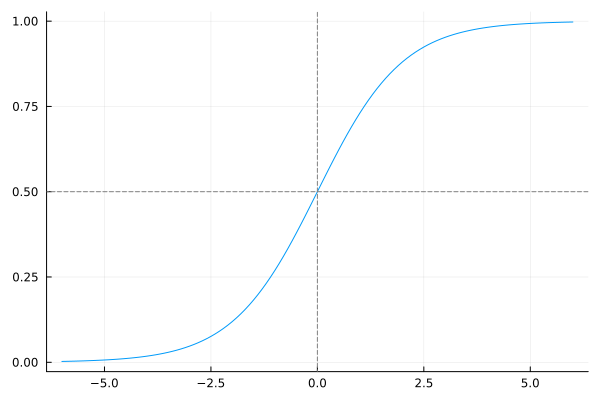

In [31]:

logistic(x) = 1 / (1 + exp(-x))
x = collect(-6:.1:6)
plot(x, logistic.(x), legend=false)
vline!([0], line=:dash, color=:grey)
hline!([1/2], line=:dash, color=:grey)

In [32]:
model_log_reg_fit = glm(Term(:class) ~ sum(Term.(Symbol.(names(dataset[:, Not(:class)])))),
                        train_dataset, Binomial())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

class ~ 1 + V0 + V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V13

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      z  Pr(>|z|)    Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)  -5.19767     0.881274    -5.90    <1e-08  -6.92493     -3.4704
V0            0.139869    0.325574     0.43    0.6675  -0.498244     0.777982
V1            0.00696932  0.0141903    0.49    0.6233  -0.0208431    0.0347818
V2           -0.0325189   0.0312191   -1.04    0.2976  -0.0937072    0.0286694
V3            0.992631    0.350958     2.83    0.0047   0.304765     1.6805
V4            0.139094    0.0471689

In [33]:
coef(model_log_reg_fit)


15-element Vector{Float64}:
 -5.197668739634521
  0.13986874624702603
  0.006969320018849393
 -0.032518913823616345
  0.9926311762982372
  0.1390942864035544
  0.12670565226709957
  0.03680541607817866
  3.2586144360149385
  0.2074888327854037
  0.10472817665520989
 -0.1066908795606531
  0.013109109185358138
 -0.0018965106677489203
  0.16285934810802974

In [34]:
train_pred = GLM.predict(model_log_reg_fit)


483-element Vector{Float64}:
 0.04127550149959478
 0.09666305878482365
 0.7787775696114306
 0.09091821939825506
 0.8915548667054086
 0.052490966840015016
 0.967159911312311
 0.8733890371467844
 0.5867662574323501
 0.9072090319281132
 0.9476576229164171
 0.9467945131482883
 0.9379154363775505
 ⋮
 0.7363262319206478
 0.09137879847780067
 0.599312768089223
 0.9183307232724122
 0.02789778008465879
 0.08147704367343263
 0.9542368716393154
 0.9604361440218079
 0.9228260300689564
 0.07569527284645423
 0.7954744356294143
 0.6131679778532466

In [35]:
test_pred = GLM.predict(model_log_reg_fit, test_dataset)


207-element Vector{Union{Missing, Float64}}:
 0.9355567272236173
 0.12016300314046284
 0.9004732033990497
 0.0678647210644879
 0.050055398403533756
 0.03209074832150892
 0.9746587110750201
 0.681823653075588
 0.9295786756682807
 0.060823025257672
 0.02632479566410766
 0.02533311393215889
 0.042529661771537816
 ⋮
 0.7702738145465097
 0.9760856679600963
 0.7061438260194476
 0.037129619965384095
 0.9530948735904834
 0.9707967935880888
 0.8980933700519672
 0.04860893026903427
 0.7251114291099757
 0.07369013291242908
 0.8079947475921138
 0.9612761653922461

In [36]:
ideal_pred = test_dataset.class


207-element Vector{Int64}:
 1
 0
 1
 1
 0
 0
 1
 1
 1
 0
 0
 0
 0
 ⋮
 0
 1
 1
 0
 1
 1
 0
 0
 1
 0
 1
 1

In [37]:

Random.seed!(42)
random_pred = rand(length(test_dataset.class))

207-element Vector{Float64}:
 0.1735745757945074
 0.32166161915780656
 0.25858546995315457
 0.16643864408566544
 0.5270150071089016
 0.48302213696845187
 0.3906633890864917
 0.802762551279973
 0.9807576556964709
 0.09443144857141617
 0.5447580773835046
 0.4339142195043123
 0.2112283719951349
 ⋮
 0.9360777781744382
 0.9664436177419788
 0.9185654715678501
 0.6579695267617874
 0.1722106854041695
 0.7219827350406843
 0.3723466293304377
 0.030185550039208087
 0.07933388944734077
 0.6637579955379869
 0.49205817172341115
 0.7132263076284362

In [38]:
conf_mat_train = freqtable(train_pred .> 0.5, train_dataset.class)
     

conf_mat_test = freqtable(test_pred .> 0.5, test_dataset.class)
     

conf_mat_ideal = freqtable(ideal_pred .> 0.5, test_dataset.class)
     

conf_mat_random = freqtable(random_pred .> 0.5, test_dataset.class)

2×2 Named Matrix{Int64}
Dim1 ╲ Dim2 │  0   1
────────────┼───────
false       │ 53  42
true        │ 61  51

In [39]:

function quality_report(mat::AbstractMatrix)
    acc = (mat[1,1] + mat[2,2]) / sum(mat)
    prec = mat[2,2] / sum(mat[2,:])
    rec = mat[2,2] / sum(mat[:,2])
    f1 = 2 * prec * rec / (prec + rec)
    println("----Classification quality report----")
    println("Accuracy: ", round(acc*100,digits=2), "%")
    println("Precision: ", round(prec*100,digits=2), "%")
    println("Recall: ", round(rec*100,digits=2), "%")
    println("F1-score: ", round(f1*100,digits=2), "%")
end
     

quality_report (generic function with 1 method)

In [40]:
println("Train set")
quality_report(conf_mat_train)
println("\nTest set")
quality_report(conf_mat_test)
println("\nWizard model:")
quality_report(conf_mat_ideal)
println("\nRandom model:")
quality_report(conf_mat_random)

Train set
----Classification quality report----
Accuracy: 86.54%
Precision: 82.82%
Recall: 87.85%
F1-score: 85.26%

Test set
----Classification quality report----
Accuracy: 89.86%
Precision: 85.29%
Recall: 93.55%
F1-score: 89.23%

Wizard model:
----Classification quality report----
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-score: 100.0%

Random model:
----Classification quality report----
Accuracy: 50.24%
Precision: 45.54%
Recall: 54.84%
F1-score: 49.76%


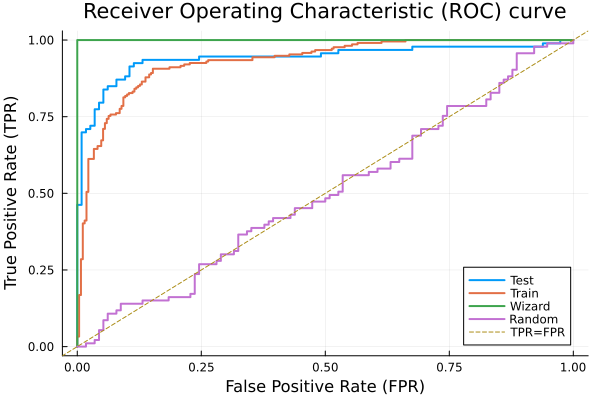

In [41]:
train_fpr, train_tpr = ROCCurves.roc(train_pred, train_dataset.class)
test_fpr, test_tpr = ROCCurves.roc(test_pred, test_dataset.class)
ideal_fpr, ideal_tpr = ROCCurves.roc(ideal_pred, test_dataset.class)
random_fpr, random_tpr = ROCCurves.roc(random_pred, dataset.class[test])

plot(test_fpr, test_tpr, label="Test", xlabel="False Positive Rate (FPR)",
    ylabel="True Positive Rate (TPR)",
    title ="Receiver Operating Characteristic (ROC) curve", linewidth=2, legend=:bottomright)
plot!(train_fpr, train_tpr, label="Train", linewidth=2)
plot!(ideal_fpr, ideal_tpr, label="Wizard", linewidth=2)
plot!(random_fpr, random_tpr, label="Random", linewidth=2)
Plots.abline!(1, 0, line=:dash, label = "TPR=FPR")

In [42]:
println("AUC metric on train dataset is equal to: ", auc_roc(train_fpr, train_tpr))
println("AUC metric on test dataset is equal to: ", auc_roc(test_fpr, test_tpr))
println("AUC metric of wizard model is equal to: ", auc_roc(ideal_fpr, ideal_tpr))
println("AUC metric of random model is equal to: ", auc_roc(random_fpr, random_tpr))

AUC metric on train dataset is equal to: 0.9302887120869958
AUC metric on test dataset is equal to: 0.9415204678362575
AUC metric of wizard model is equal to: 1.0
AUC metric of random model is equal to: 0.5


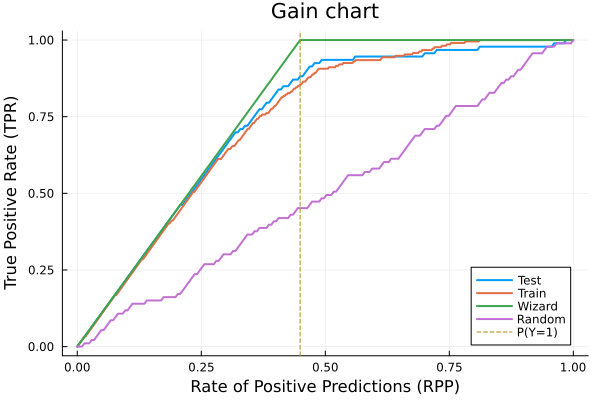

In [43]:

test_rpp = collect(0:length(test_tpr)-1)./(length(test_tpr)-1)
train_rpp = collect(0:length(train_tpr)-1)./(length(train_tpr)-1)

plot(test_rpp, test_tpr, label="Test", xlabel="Rate of Positive Predictions (RPP)",
     ylabel="True Positive Rate (TPR)", title= "Gain chart", linewidth=2, legend=:bottomright)
plot!(train_rpp, train_tpr, label="Train", linewidth=2)
plot!(test_rpp, ideal_tpr, label="Wizard", linewidth=2)
plot!(test_rpp, random_tpr, label="Random", linewidth=2)
vline!([mean(dataset.class[test])] ,line=:dash, label = "P(Y=1)")
     

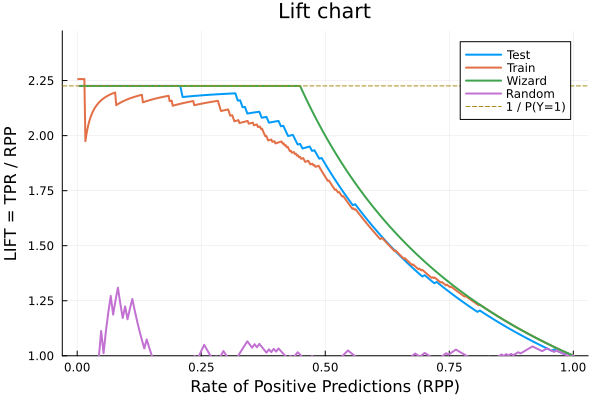

In [44]:
plot(test_rpp, test_tpr ./ test_rpp, label="Test", xlabel="Rate of Positive Predictions (RPP)",
     ylabel="LIFT = TPR / RPP", title= "Lift chart", linewidth=2, legend=:topright,
     ylim = (1, 0.25+1/mean(dataset.class[test])))
plot!(train_rpp, train_tpr ./ train_rpp, label="Train", linewidth=2)
plot!(test_rpp, ideal_tpr ./ test_rpp, label="Wizard", linewidth=2)
plot!(test_rpp, random_tpr ./ test_rpp, label="Random", linewidth=2)
Plots.abline!(0, 1/mean(dataset.class[test]),  
     line=:dash, label = "1 / P(Y=1)")
     

In [45]:

test_pred_1 = test_pred[test_dataset.class .== 1]
test_pred_0 = test_pred[test_dataset.class .== 0];

In [46]:

test_pred_1 = test_pred[test_dataset.class .== 1]
test_pred_0 = test_pred[test_dataset.class .== 0];

In [47]:

ideal_pred_1 = ideal_pred[test_dataset.class .== 1]
ideal_pred_0 = ideal_pred[test_dataset.class .== 0];

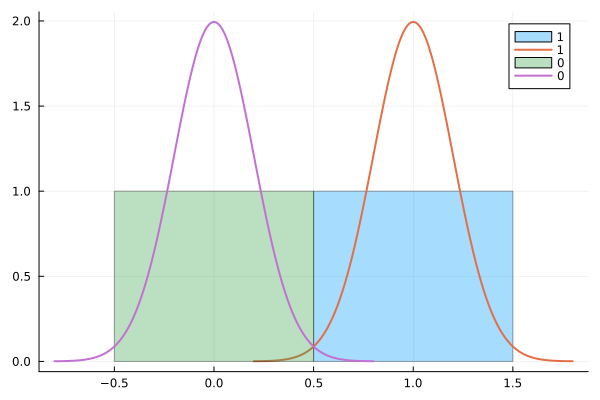

In [48]:
histogram(ideal_pred_1.-0.5, normalize=true, bins=10, label=1, seriesalpha=0.35)
density!(ideal_pred_1, label=1, bandwidth=.2, linewidth=2)
histogram!(ideal_pred_0.-0.5, normalize=true, bins=10, label=0, seriesalpha=0.35)
density!(ideal_pred_0, label=0, bandwidth=0.2, linewidth=2)

In [49]:
random_pred_1 = random_pred[test_dataset.class .== 1]
random_pred_0 = random_pred[test_dataset.class .== 0];

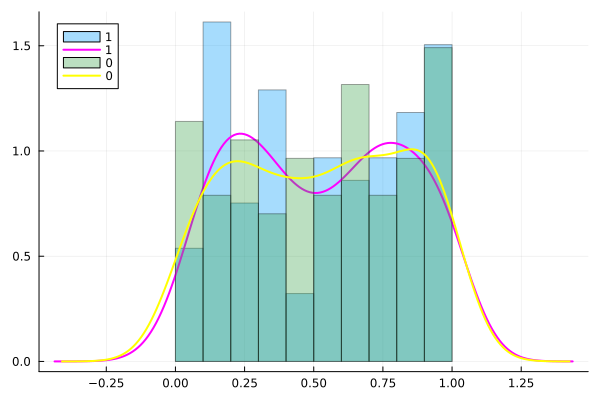

In [50]:

histogram(random_pred_1, normalize=true, bins=10, label=1, seriesalpha=0.35)
density!(random_pred_1, label=1, linewidth=2, color="magenta")
histogram!(random_pred_0, normalize=true, bins=10, label=0, seriesalpha=0.35)
density!(random_pred_0, label=0, linewidth=2, color="yellow")